<a href="https://colab.research.google.com/github/dudco0040/dudco0040/blob/master/under_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt",
filename="ratings_total.txt")
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Total 91 (delta 0), reused 0 (delta 0), pack-reused 91
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.8 MB/s 
     |████████████████████████████████| 448 kB 68.6 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-12-16 09:10:12--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.

In [ ]:
#label(긍정,중립,부정) 분리하기
#1:부정, 2~4:중립, 5:긍정
total_data['label'] = np.select([(total_data.ratings==5),(total_data.ratings==4),(total_data.ratings==2),(total_data.ratings==1)], [1,0,0,-1])  # -1:부정, 0:중립, 1:긍정
total_data[:5]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [ ]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 3)

In [ ]:
total_data.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 199908


In [ ]:
print(total_data.isnull().values.any())

False


훈련용 리뷰의 개수 : 149931
테스트용 리뷰의 개수 : 49977


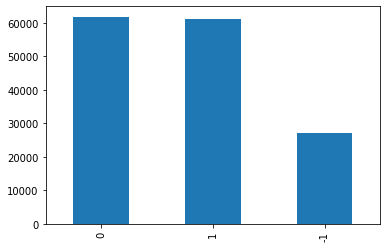

In [ ]:
#train/test data 나누기
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
label_negative = train_data[(train_data['label'] == -1)]
label_neutral = train_data[(train_data['label'] == 0)]
label_positive = train_data[(train_data['label'] == 1)]

In [ ]:
len(label_negative)

27091

In [ ]:
label_positive.head()

,ratings,reviews,label
158109,5,적당하고 만족합니다,1
128534,5,아기 어릴때부터 항상 써오던거에요~,1
61283,5,몸에 좋은 카카오닙스 강력 추천 배송도 빠르고 지프펙으로 250g 2팩 왔네요. 보...,1
2119,5,빠른배송~슬림핏이라서 너무 타잇하면어쩌나했는데 딱이쁩니다~,1
177546,5,추천합니다 독일 니베아 크림 필요해서 폭풍 검색하다가 여기가 제일 싸고 평이 많아서...,1


In [ ]:
#3000개 랜덤 샘플링
neutral_sample = label_neutral.sample(n=30000,random_state = 1)
positive_sample = label_positive.sample(n=30000,random_state = 1)

In [ ]:
len(positive_sample)

30000

In [ ]:
import pandas as pd
train_data_undersampling = pd.concat([positive_sample,neutral_sample,label_negative], axis = 0)

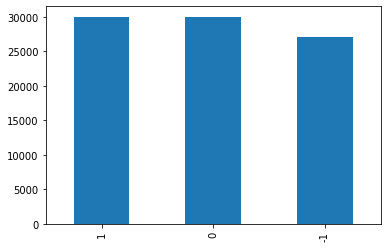

In [ ]:
train_data_undersampling['label'].value_counts().plot(kind = 'bar')

In [ ]:
# 한글과 공백을 제외하고 모두 제거
train_data_undersampling['reviews'] = train_data_undersampling['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data_undersampling['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

ratings    0
reviews    0
label      0
dtype: int64
전처리 후 테스트용 샘플의 개수 : 49977


In [ ]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

#불용어 정의
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

train_data_undersampling['tokenized'] = train_data_undersampling['reviews'].apply(mecab.morphs)
train_data_undersampling['tokenized'] = train_data_undersampling['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

test_data['tokenized'] = test_data['reviews'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

#단어와 길이 분포 확인하기
negative_words = np.hstack(train_data_undersampling[train_data_undersampling.label == -1]['tokenized'].values)
neutrality_words = np.hstack(train_data_undersampling[train_data_undersampling.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data_undersampling[train_data_undersampling.label == 1]['tokenized'].values)

negative_word_count = Counter(negative_words)
neutrality_words_count = Counter(neutrality_words)
positive_words_count = Counter(positive_words)

#빈도수가 높은 상위 20개 단어만 출력
print("부정 리뷰")
print(negative_word_count.most_common(20))
print("중립 리뷰")
print(neutrality_words_count.most_common(20))
print("긍정 리뷰")
print(positive_words_count.most_common(20))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']
부정 리뷰
[('네요', 11653), ('안', 8369), ('는데', 8012), ('어요', 5544), ('너무', 4811), ('있', 4619), ('했', 4448), ('구매', 3838), ('없', 3682), ('배송', 3426), ('거', 3425), ('되', 3392), ('어', 3376), ('습니다', 3219), ('그냥', 3064), ('좋', 3001), ('같', 2981), ('나', 2907), ('만', 2820), ('요', 2751)]
중립 리뷰
[('네요', 11938), ('는데', 7179), ('좋', 6895), ('어요', 6121), ('안', 6069), ('있', 5572), ('아요', 5108), ('했', 4544), ('너무', 4412), ('잘', 4307), ('배송', 4176), ('같', 3895), ('습니다', 3780), ('구매', 3665), ('어', 3359), ('거', 3358), ('않', 3051), ('되', 2949), ('요', 2800), ('없', 2786)]
긍정 리뷰
[('좋', 15777), ('아요', 8224), ('네요', 7550), ('어요', 7422), ('잘', 7390), ('구매', 6865), ('습니다', 5263), ('배송', 5016), ('있', 4824), ('는데', 4538), ('합니다', 4027), ('재', 4000), ('먹', 3918), ('했', 3876), ('너무', 3688), ('만족', 3009), ('같', 2866), ('쓰', 2506), ('거', 2492), ('어', 2473)]


In [ ]:
X_train = train_data_undersampling['tokenized'].values
y_train = train_data_undersampling['label'].values

X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
#정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value
  # 단어의 등장 빈도수가 threshold보다 작으면
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value
    
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 31578
등장 빈도가 1번 이하인 희귀 단어의 수: 14220
단어 집합에서 희귀 단어의 비율: 45.03135094052821
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.039162239387318


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

print(X_train[:3])
print(X_test[:3])

단어 집합의 크기 : 17360
[[89, 13, 505, 14, 13, 136, 4931, 1927, 322, 682, 37, 275, 111, 12, 14, 111, 23], [1051, 11, 3, 31, 2, 4227, 104, 34, 437, 24, 107, 3, 7, 1581, 262, 87, 59, 49, 54, 94, 142, 5], [3123, 3, 3, 7]]
[[11, 736, 786, 112, 153, 274, 14], [375, 3966, 65, 3663, 1767], [13, 82, 2, 50, 178, 3, 28, 15, 7, 515, 293, 17, 87, 120, 527, 58, 10, 2]]


In [ ]:
#one-hot encoding

import numpy as np 
y_train_onehot = [] 
y_test_onehot = [] 
for i in range(len(y_train)): 
  if y_train[i] == 1: 
    y_train_onehot.append([0, 0, 1]) 
  elif y_train[i] == 0: 
    y_train_onehot.append([0, 1, 0]) 
  elif y_train[i] == -1: 
    y_train_onehot.append([1, 0, 0]) 
    
  
for i in range(len(y_test)): 
  if y_test[i] == 1:
    y_test_onehot.append([0, 0, 1])
  elif y_test[i] == 0: 
    y_test_onehot.append([0, 1, 0]) 
  elif y_test[i] == -1: 
    y_test_onehot.append([1, 0, 0]) 

y_train_onehot = np.array(y_train_onehot) 
y_test_onehot = np.array(y_test_onehot)


In [ ]:
len(X_train)

87091

리뷰의 최대 길이 : 73
리뷰의 평균 길이 : 15.712415749044103


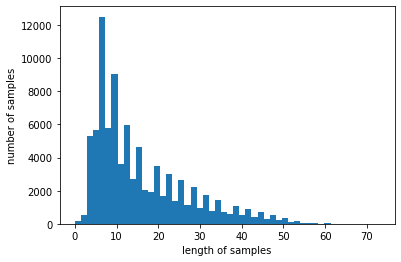

In [ ]:
#패딩
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
      count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))
  
max_len = 65
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 65 이하인 샘플의 비율: 99.99311065437301


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
X_train #패딩이 완료된 input data

array([[  0,   0,   0, ...,  14, 111,  23],
       [  0,   0,   0, ...,  94, 142,   5],
       [  0,   0,   0, ...,   3,   3,   7],
       ...,
       [  0,   0,   0, ..., 106,  27,  35],
       [  0,   0,   0, ...,  22,  38,  14],
       [  0,   0,   0, ..., 598,  20,  91]], dtype=int32)

In [ ]:
#LSTM 사용
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(3, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train_onehot, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1089/1089 [==============================] - ETA: 0s - loss: 0.7028 - acc: 0.6941
Epoch 00001: val_acc improved from -inf to 0.01676, saving model to best_model.h5
1089/1089 [==============================] - 196s 178ms/step - loss: 0.7028 - acc: 0.6941 - val_loss: 1.4812 - val_acc: 0.0168
Epoch 2/15
1089/1089 [==============================] - ETA: 0s - loss: 0.6307 - acc: 0.7238
Epoch 00002: val_acc improved from 0.01676 to 0.33314, saving model to best_model.h5
1089/1089 [==============================] - 180s 165ms/step - loss: 0.6307 - acc: 0.7238 - val_loss: 1.1284 - val_acc: 0.3331
Epoch 3/15
1089/1089 [==============================] - ETA: 0s - loss: 0.6033 - acc: 0.7397
Epoch 00003: val_acc did not improve from 0.33314
1089/1089 [==============================] - 177s 163ms/step - loss: 0.6033 - acc: 0.7397 - val_loss: 1.7732 - val_acc: 0.0991
Epoch 4/15
1089/1089 [==============================] - ETA: 0s - loss: 0.5817 - acc: 0.7528
Epoch 00004: val_acc did not i

In [ ]:
print("\n 테스트 정확도: {:.2f}%".format(model.evaluate(X_test,y_test_onehot)[1]*100))

1562/1562 [==============================] - 36s 23ms/step - loss: 0.7081 - acc: 0.6945

 테스트 정확도: 69.45%
